In [111]:
# Importing pandas and numpy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [83]:
house = pd.read_csv('Lab0_data/housing.csv')
house.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [84]:
house_train = house.sample(frac = 0.7,random_state = 9)# Splitting into 70% train data and 30% test data
house_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
464,7.83930,0.0,18.10,0,0.655,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4
419,11.81200,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666,20.2,48.45,22.74,8.4
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,4.16,33.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5


In [85]:
house_test = house.drop(house_train.index)#Creating test data from the remaining data
house_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
22,1.23250,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2


In [86]:
house_train_Y = house_train.pop('Y')# Getting the labels for train data
house_test_Y = house_test.pop('Y')# Getting the labels for test data

In [87]:
def mean_std_cols(data):
    """
    Calculates and returns mean and standard deviation of each features as an array

    """
    cols = [col for col in data.columns]
    mean = []
    std = []
    for col in cols:
        mean.append(np.mean(data.loc[:,col]))
        std.append(np.std(data.loc[:,col]))
    return mean, std


In [88]:
def z_score_normalisation(x, mean, std):
    """
    Returns a z-score normalised dataframe 
    
    """
    cols = [col for col in x.columns]
    norm_x = pd.DataFrame()
    mean_ = std_= 0
    norm_func = lambda x: (x-mean_)/std_ 
    for i,col in enumerate(cols):
        mean_ = mean[i]
        std_ = std[i]
        norm_x[col] = x[col].apply(norm_func)
    return norm_x

In [89]:
def gdtrain(x,y,w,lr,tol):
   
    """
    Gradient Descent Algrithm with 50000 epochs
    x-Training dataset;y-Training labels;w-Weights;
    lr-Learning Rate;tol-Tolerance(RMSE)
    """
    tollist = [0]*50000
    for i in range(50000):
        #print("here")
        f = np.dot(x,w.T)-y
        tollist[i] = np.sqrt(np.mean(f**2))
        dw = 2*np.dot(f.T,x)/len(x)
        if(i==0):
            w = w-lr*dw
        else:
            if(tollist[i-1]-tollist[i]>tol):
                w = w-lr*dw
            else:
                return w
                break

In [90]:
def rmse(x,y,w):
    y_hat = x.dot(w.T)
    return (np.sqrt(np.mean((y_hat-y)**2)))

In [91]:
house_mean, house_var = mean_std_cols(housedf_train)

In [92]:
house_norm_train = z_score_normalisation(housedf_train,house_mean,house_var)
house_norm_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
464,0.709771,-0.471970,1.050259,-0.281546,0.877131,-0.138291,-0.094892,-0.408922,1.783074,1.623672,0.816934,0.430154,0.155841
419,1.289570,-0.471970,1.050259,-0.281546,1.417922,0.763584,0.302073,-0.993397,1.783074,1.623672,0.816934,-3.553291,1.570357
277,-0.425399,1.261199,-0.669752,3.551814,-0.908339,0.766517,-1.446720,0.540413,-0.590781,-0.881982,-0.352438,0.390714,-1.190327
491,-0.418909,-0.471970,2.468643,-0.281546,0.482267,-0.469711,1.099580,-0.956361,-0.590781,1.897348,0.771959,0.352532,0.876472
337,-0.429903,-0.471970,-0.849257,-0.281546,-0.324628,-0.598760,-0.302316,0.916368,-0.472089,-1.064432,0.816934,0.406262,-0.239392


In [93]:
house_norm_train['reg_coef'] = 1
house_norm_train.shape

(354, 14)

In [94]:
house_norm_test = z_score_normalisation(housedf_test,house_mean,house_var)
house_norm_test['reg_coef'] = 1

In [95]:
house_train_y = house_train_Y.to_numpy().reshape(-1,1)
w = np.zeros((1,norm_x_train.shape[1]))

In [96]:
house_train_y.shape

(354, 1)

In [97]:
w = gdtrain(house_norm_train,house_train_y,w,0.4*(10**-3),0.5*(10**-2))

In [98]:
print (w)

[[-0.53411911  0.5271855  -0.59282236  1.08072151 -0.42629861  2.65641908
  -0.23832812 -0.76974512  0.22086938 -0.32537717 -1.4476205   0.66275659
  -2.6313615  15.74218627]]


In [124]:
def pipeline(x,lr,tol):
    x_train = x.sample(frac = 0.7,random_state = 9)# Splitting into 70% train data and 30% test data
    x_test = x.drop(x_train.index)#Creating test data from the remaining data
    y_train = x_train.pop('Y')# Getting the labels for train data
    y_test = x_test.pop('Y')# Getting the labels for test data
    # Getting mean and standard deviation from the train data
    x_mean, x_std = mean_std_cols(x_train)
    # Normalisation of the datasets with the mean and standard deviation
    x_train_norm = z_score_normalisation(x_train,x_mean,x_std)
    x_test_norm = z_score_normalisation(x_test,x_mean,x_std)
    # Adding a column of ones 
    x_train_norm['reg_coef'] = 1
    x_test_norm['reg_coef'] = 1
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    # Initialising the weights with zeros 
    w = np.zeros((1,x_train_norm.shape[1]))
    # Calculating the weights using gradient descent with the given learning rate and tolerance
    w_trained = gdtrain(x_train_norm,y_train,w,lr,tol)
    # Calculating the weights using the general equation
    w_Ne = (np.linalg.inv(x_train_norm.T.dot(x_train_norm)).dot(x_train_norm.T)).dot(y_train)
    # Calculating the RMSE of both the weights  
    rmse_grad = rmse(x_test_norm,y_test,w_trained)[0]
    rmse_ne = rmse(x_test_norm,y_test,w_Ne.T)[0]
    plt.bar(['RMSE-Gradient Descent','RMSE-General'],[rmse_grad,rmse_ne])
    plt.title('Comparison')
    plt.show()





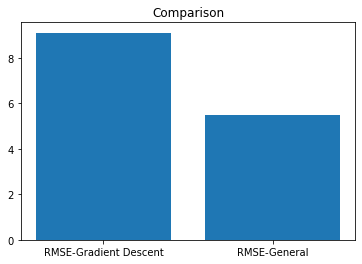

In [125]:
pipeline(house,0.0004,0.005)